Slope (m): 171.1732732937618
Intercept (b): 1627.3680380250194
Prediction for 2500 sqft: $429560.55


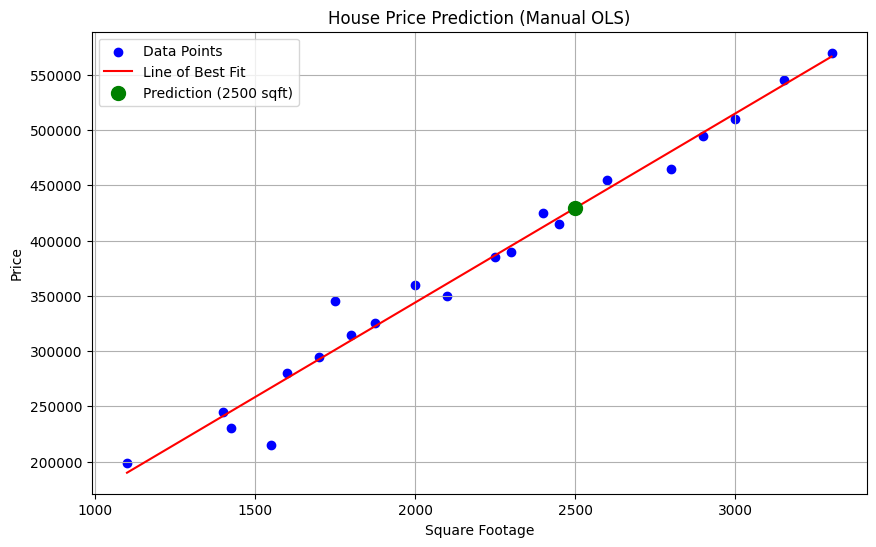

In [15]:
#Using Ordinary least square method
import numpy as np
import matplotlib.pyplot as plt
import csv
# Loading CSV file from Google Colab
file_path = "/content/housing_prices - housing_prices.csv"

x_list = []
y_list = []

try:
    with open(file_path, 'r') as file:
        lines = file.readlines()

        # Skip the header
        for line in lines[1:]:
            parts = line.strip().split(',')
            x_list.append(float(parts[0]))  # Feature: Square Footage
            y_list.append(float(parts[1]))  # Target: Price

except FileNotFoundError:
    print("CSV file not found! Check file path.")
    x_list = [0]
    y_list = [0]

# Convert lists to numpy arrays for math operations
X = np.array(x_list)
Y = np.array(y_list)

# Implementing OLS to find 'm' and 'b' ---
# Formula for m: (N * sum(xy) - sum(x)*sum(y)) / (N * sum(x^2) - sum(x)^2)
# Formula for b: (sum(y) - m * sum(x)) / N

N = len(X)

sum_x = np.sum(X)
sum_y = np.sum(Y)
sum_xy = np.sum(X * Y)
sum_x_squared = np.sum(X ** 2)

# Calculate slope (m)
numerator = (N * sum_xy) - (sum_x * sum_y)
denominator = (N * sum_x_squared) - (sum_x ** 2)
m = numerator / denominator

# Calculate intercept (b)
b = (sum_y - (m * sum_x)) / N

print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

#Prediction Function ---
def get_prediction(sqft):
    return m * sqft + b

#Predict price for 2,500 sq ft
target_sqft = 2500
predicted_price = get_prediction(target_sqft)
print(f"Prediction for {target_sqft} sqft: ${predicted_price:.2f}")


# Plotting the Best Fit Line ---
# Generate points for the line
x_line = np.linspace(np.min(X), np.max(X), 100)
y_line = m * x_line + b

plt.figure(figsize=(10, 6))

# Plot original data
plt.scatter(X, Y, color='blue', label='Data Points')

# Plot regression line
plt.plot(x_line, y_line, color='red', label='Line of Best Fit')

# Plot the prediction point
plt.scatter(target_sqft, predicted_price, color='green', s=100, zorder=5, label='Prediction (2500 sqft)')

plt.title('House Price Prediction (Manual OLS)')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Gradient Descent Prediction for 2500 sqft: $429560.55


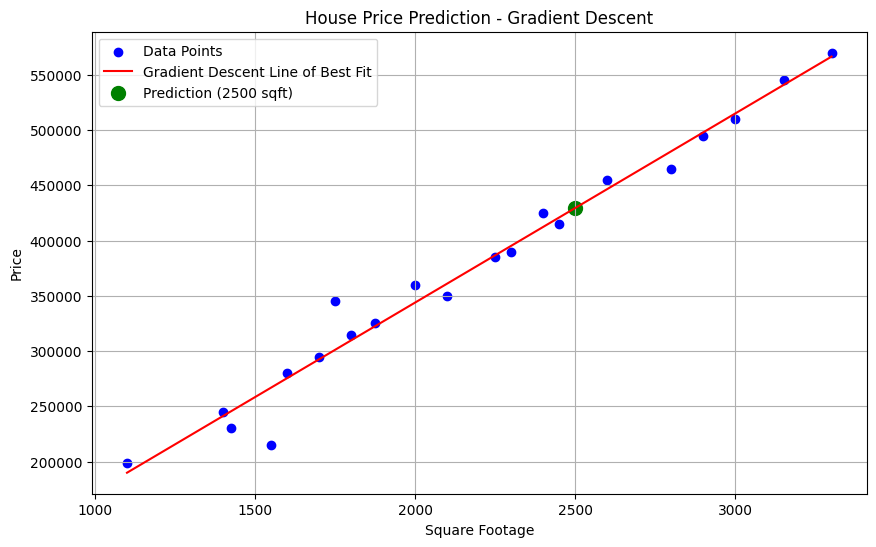

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Read your actual CSV file
file_path = "/content/housing_prices - housing_prices.csv"

x_list = []
y_list = []

try:
    with open(file_path, 'r') as file:
        lines = file.readlines()

        # Skip the header line
        for line in lines[1:]:
            parts = line.strip().split(',')
            x_list.append(float(parts[0]))  # Square footage
            y_list.append(float(parts[1]))  # Price

except FileNotFoundError:
    print("CSV file not found! Please upload or check path.")
    x_list = [0]
    y_list = [0]

# Convert to numpy arrays
X = np.array(x_list)
Y = np.array(y_list)

# Data Normalization ---
mu_x = np.mean(X)
sigma_x = np.std(X)
mu_y = np.mean(Y)
sigma_y = np.std(Y)

X_norm = (X - mu_x) / sigma_x
Y_norm = (Y - mu_y) / sigma_y

#  Gradient Descent ---
def gradient_descent(x, y, learning_rate, iterations):
    m = 0
    b = 0
    n = len(x)

    for i in range(iterations):
        y_pred = m * x + b
        dm = -(2/n) * np.sum(x * (y - y_pred))
        db = -(2/n) * np.sum(y - y_pred)

        m = m - learning_rate * dm
        b = b - learning_rate * db

    return m, b

learning_rate = 0.1
iterations = 1000
m_norm, b_norm = gradient_descent(X_norm, Y_norm, learning_rate, iterations)

# Prediction for 2500 sqft ---
target_sqft = 2500
target_norm = (target_sqft - mu_x) / sigma_x
pred_norm = m_norm * target_norm + b_norm
predicted_price = pred_norm * sigma_y + mu_y

print(f"Gradient Descent Prediction for {target_sqft} sqft: ${predicted_price:.2f}")


#  Plotting ---
x_line_norm = np.linspace(min(X_norm), max(X_norm), 100)
y_line_norm = m_norm * x_line_norm + b_norm

x_line = x_line_norm * sigma_x + mu_x
y_line = y_line_norm * sigma_y + mu_y

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(x_line, y_line, color='red', label='Gradient Descent Line of Best Fit')
plt.scatter(target_sqft, predicted_price, color='green', s=100, label='Prediction (2500 sqft)')

plt.title('House Price Prediction - Gradient Descent')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Test Prediction
Runner Stats: 25 km/h, 1 Ammo Clip
Survival Probability: 0.9995
Predicted Class: 1 (Survive)


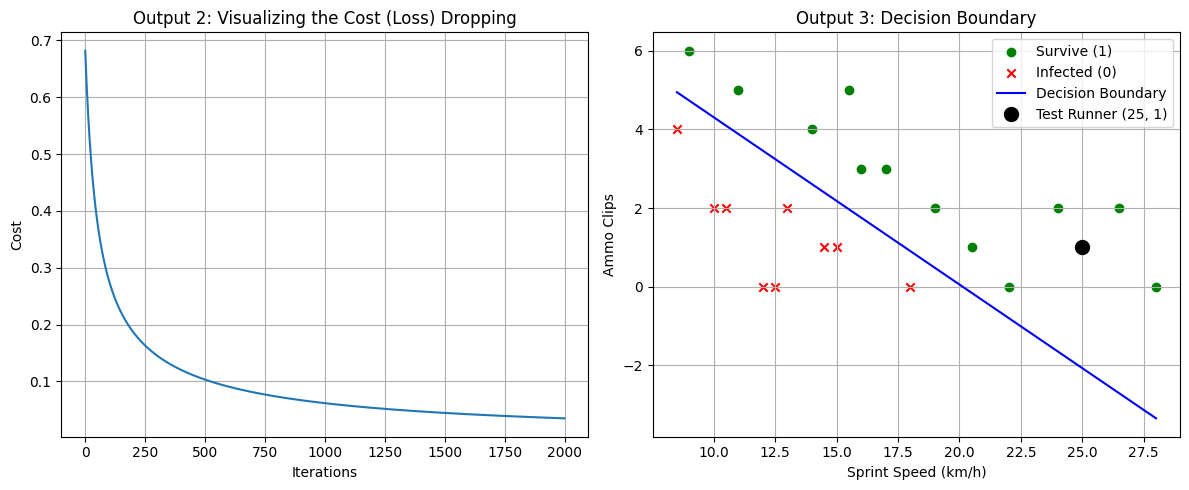

In [17]:
import numpy as np
import matplotlib.pyplot as plt
# 1. LOAD DATA FROM FILE PATH
file_path = "/content/zombies_data - Sheet1.csv"

data = np.genfromtxt(file_path, delimiter=",", skip_header=1)

X = data[:, :2]  # Features: Speed, Ammo
y = data[:, 2]   # Label: (1 = Survive, 0 = Infected)

# 2. DATA NORMALIZATION (Z-Score Standardization)
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_norm = (X - mean) / std

# Add Bias term (intercept)
m, n = X_norm.shape
X_b = np.c_[np.ones((m, 1)), X_norm]
# 3. HELPER FUNCTIONS (Sigmoid, Cost, Gradient)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (-1/m) * (y @ np.log(h + epsilon) + (1 - y) @ np.log(1 - h + epsilon))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        gradients = (1/m) * X.T @ (sigmoid(X @ theta) - y)
        theta = theta - learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history
# 4. TRAIN MODEL
theta_initial = np.zeros(X_b.shape[1])
learning_rate = 0.1
iterations = 2000

theta_optimal, costs = gradient_descent(X_b, y, theta_initial, learning_rate, iterations)

# 5. PREDICTION
runner_data = np.array([25, 1])  # Example runner
runner_norm = (runner_data - mean) / std
runner_b = np.r_[1, runner_norm]

probability = sigmoid(runner_b @ theta_optimal)
prediction = 1 if probability >= 0.5 else 0

print(f"Test Prediction")
print(f"Runner Stats: 25 km/h, 1 Ammo Clip")
print(f"Survival Probability: {probability:.4f}")
print(f"Predicted Class: {prediction} ({'Survive' if prediction == 1 else 'Infected'})")

# 6. VISUALIZATION
plt.figure(figsize=(12, 5))

# Plot 1: Cost History
plt.subplot(1, 2, 1)
plt.plot(costs)
plt.title("Output 2: Visualizing the Cost (Loss) Dropping")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)

# Plot 2: Decision Boundary
plt.subplot(1, 2, 2)

positive = data[data[:, 2] == 1]
negative = data[data[:, 2] == 0]

plt.scatter(positive[:, 0], positive[:, 1], c='g', label='Survive (1)', marker='o')
plt.scatter(negative[:, 0], negative[:, 1], c='r', label='Infected (0)', marker='x')

# Compute Decision Boundary
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x_values = np.linspace(x1_min, x1_max, 100)

x_values_norm = (x_values - mean[0]) / std[0]
y_values_norm = -(theta_optimal[0] + theta_optimal[1] * x_values_norm) / theta_optimal[2]
y_values = y_values_norm * std[1] + mean[1]

plt.plot(x_values, y_values, "b-", label="Decision Boundary")
plt.plot(25, 1, 'ko', markersize=10, label="Test Runner (25, 1)")

plt.title("Output 3: Decision Boundary")
plt.xlabel("Sprint Speed (km/h)")
plt.ylabel("Ammo Clips")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()